In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

1.6.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
assert torch.__version__.startswith("1.6")
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
%cd drive/My Drive/cyc3600

/content/drive/My Drive/cyc3600


In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances('cyclone_ds_train', {}, 'ftrain80.json', 'train')

In [ ]:
cyclone_metadata = MetadataCatalog.get('cyclone_ds_train')

In [ ]:
dataset_dicts = DatasetCatalog.get('cyclone_ds_train')

[09/12 15:43:42 d2.data.datasets.coco]: Loaded 3977 images in COCO format from ftrain80.json


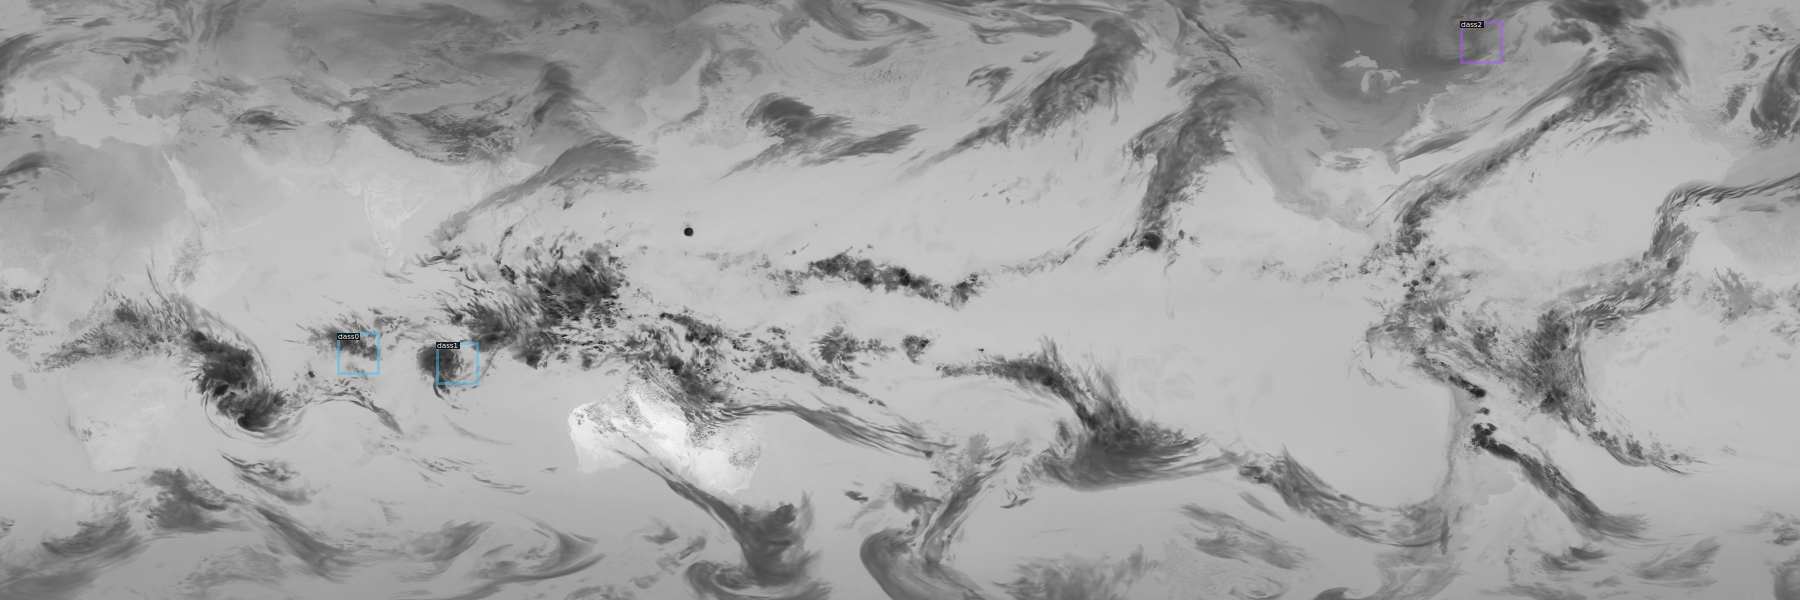

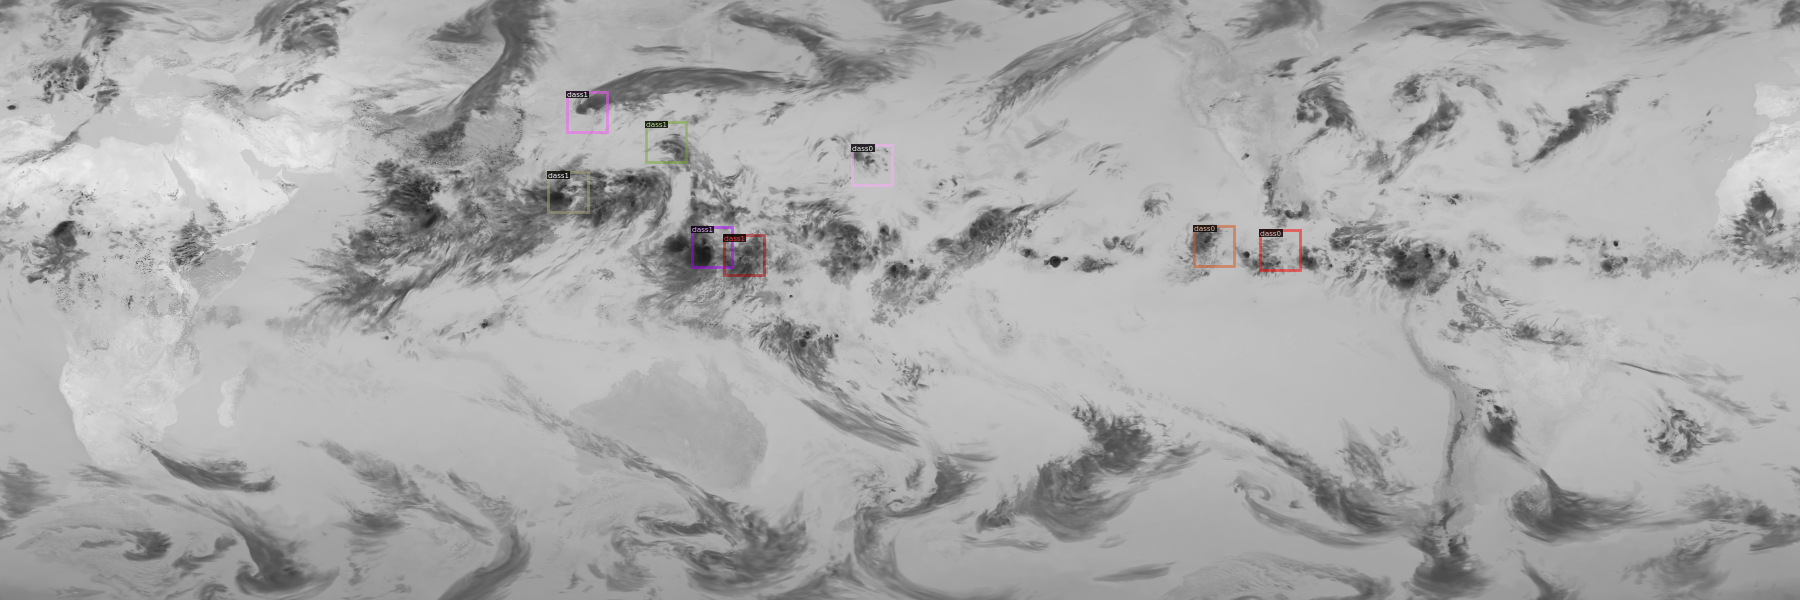

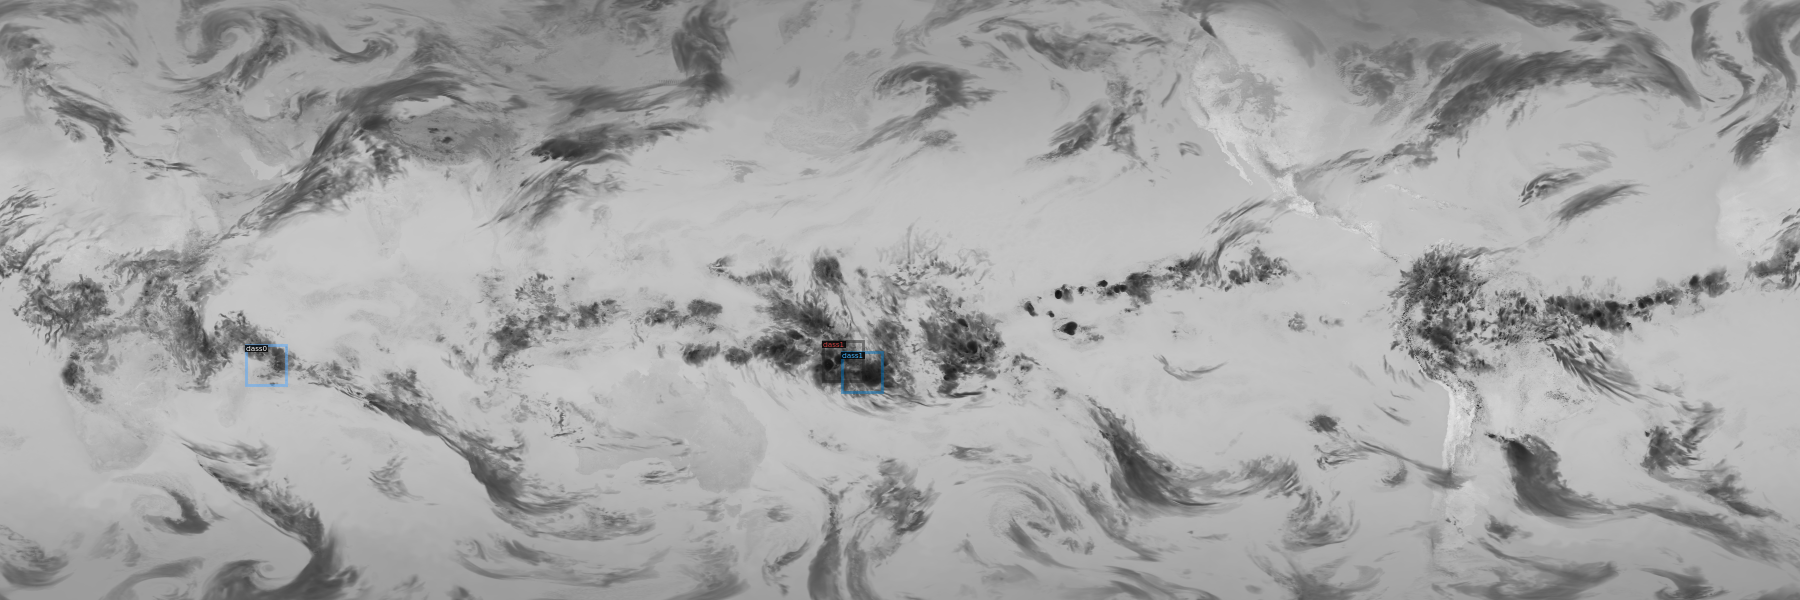

In [ ]:
import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=cyclone_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
#cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_101_FPN_3x.yaml"))
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml"))
# cfg.merge_from_file(
#     "./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
# )
cfg.DATASETS.TRAIN = ("cyclone_ds_train",)
cfg.DATASETS.TEST = ()  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
#cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.002
cfg.SOLVER.MAX_ITER = (
    2000
)  # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = (
    1024
)  # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4  # 3 classes (data, fig, hazelnut)
cfg.INPUT.MAX_SIZE_TEST = 3600
cfg.INPUT.MAX_SIZE_TRAIN = 3600
cfg.INPUT.MIN_SIZE_TEST = 1201
cfg.INPUT.MIN_SIZE_TRAIN = 1201
cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[60,70,80,90]]


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[09/12 15:44:14 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

R-50.pkl: 102MB [00:02, 49.9MB/s]                            


[09/12 15:44:18 d2.checkpoint.c2_model_loading]: Remapping C2 weights ......
[09/12 15:44:18 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.0.conv1.norm.bias            loaded from res2_0_branch2a_bn_beta           of shape (64,)
[09/12 15:44:18 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.0.conv1.norm.running_mean    loaded from res2_0_branch2a_bn_running_mean   of shape (64,)
[09/12 15:44:18 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.0.conv1.norm.running_var     loaded from res2_0_branch2a_bn_running_var    of shape (64,)
[09/12 15:44:18 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.0.conv1.norm.weight          loaded from res2_0_branch2a_bn_gamma          of shape (64,)
[09/12 15:44:18 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.0.conv1.weight               loaded from res2_0_branch2a_w                 of shape (64, 64, 1, 1)
[09/12 15:44:18 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.0.conv2.norm.bias         

/usr/local/lib/python3.6/dist-packages/detectron2/layers/wrappers.py:226: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  return x.nonzero().unbind(1)


[09/12 15:45:25 d2.utils.events]:  eta: 1:13:56  iter: 19  total_loss: 2.081  loss_cls: 1.021  loss_box_reg: 0.024  loss_rpn_cls: 0.703  loss_rpn_loc: 0.286  time: 2.2360  data_time: 0.9576  lr: 0.000040  max_mem: 9618M
[09/12 15:46:12 d2.utils.events]:  eta: 1:15:00  iter: 39  total_loss: 1.104  loss_cls: 0.162  loss_box_reg: 0.054  loss_rpn_cls: 0.680  loss_rpn_loc: 0.207  time: 2.2722  data_time: 0.0067  lr: 0.000080  max_mem: 9618M
[09/12 15:46:59 d2.utils.events]:  eta: 1:15:08  iter: 59  total_loss: 1.055  loss_cls: 0.186  loss_box_reg: 0.065  loss_rpn_cls: 0.647  loss_rpn_loc: 0.164  time: 2.3125  data_time: 0.0068  lr: 0.000120  max_mem: 9618M
[09/12 15:47:48 d2.utils.events]:  eta: 1:15:17  iter: 79  total_loss: 0.939  loss_cls: 0.127  loss_box_reg: 0.047  loss_rpn_cls: 0.630  loss_rpn_loc: 0.139  time: 2.3461  data_time: 0.0065  lr: 0.000160  max_mem: 9618M
[09/12 15:48:38 d2.utils.events]:  eta: 1:15:39  iter: 99  total_loss: 0.898  loss_cls: 0.118  loss_box_reg: 0.048  loss

In [ ]:
register_coco_instances('cyclone_ds_val', {}, 'fval80.json', 'val')

In [ ]:
val_metadata = MetadataCatalog.get('cyclone_ds_val')
val_dicts = DatasetCatalog.get('cyclone_ds_val')

[09/12 17:18:51 d2.data.datasets.coco]: Loaded 1439 images in COCO format from fval80.json


In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
#cfg.MODEL.WEIGHTS = '/content/drive/My Drive/cyc1440/output/model_final.pth'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4 # set the testing threshold for this model
cfg.DATASETS.TEST = ("cyclone_ds_val", )
predictor = DefaultPredictor(cfg)

In [ ]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(val_dicts, 30):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    print(outputs)

{'instances': Instances(num_instances=1, image_height=1201, image_width=3600, fields=[pred_boxes: Boxes(tensor([[1364.3110,  750.2795, 1443.4104,  830.9423]], device='cuda:0')), scores: tensor([0.4903], device='cuda:0'), pred_classes: tensor([1], device='cuda:0')])}
{'instances': Instances(num_instances=1, image_height=1201, image_width=3600, fields=[pred_boxes: Boxes(tensor([[630.0616, 766.7817, 710.6912, 845.0326]], device='cuda:0')), scores: tensor([0.7996], device='cuda:0'), pred_classes: tensor([2], device='cuda:0')])}
{'instances': Instances(num_instances=1, image_height=1201, image_width=3600, fields=[pred_boxes: Boxes(tensor([[1334.5488,  462.6890, 1413.3682,  542.6447]], device='cuda:0')), scores: tensor([0.6332], device='cuda:0'), pred_classes: tensor([1], device='cuda:0')])}
{'instances': Instances(num_instances=1, image_height=1201, image_width=3600, fields=[pred_boxes: Boxes(tensor([[1660.5751,  642.0732, 1739.9816,  722.1267]], device='cuda:0')), scores: tensor([0.4308], 